# Importing and Loading packages

### First, we need to install the package "here" so that we can call all mudules without thinking about path. 

### Then, we can load and install the rest of the packages from the file module.R 


In [85]:
install.packages("ggfortify")
library(here, help, pos = 2, lib.loc = NULL)
source(here('Modules','modules.R'))
#install_all_packages()
load_library_packages()

Installing package into 'C:/Users/maria/Documents/R/win-library/4.1'
(as 'lib' is unspecified)



package 'ggfortify' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\maria\AppData\Local\Temp\RtmpmMvA4B\downloaded_packages


Warning message:
"package 'ggfortify' was built under R version 4.1.1"


[[1]]
[1] TRUE

[[2]]
[1] TRUE

[[3]]
[1] TRUE

[[4]]
[1] TRUE

[[5]]
[1] TRUE

[[6]]
[1] TRUE

[[7]]
[1] TRUE

[[8]]
[1] TRUE

[[9]]
[1] TRUE

[[10]]
[1] TRUE

[[11]]
[1] TRUE

[[12]]
[1] TRUE

[[13]]
[1] TRUE

[[14]]
[1] TRUE

[[15]]
[1] TRUE

[[16]]
[1] TRUE

[[17]]
[1] TRUE

[[18]]
[1] TRUE

[[19]]
[1] TRUE

[[20]]
[1] TRUE

[[21]]
[1] TRUE

[[22]]
[1] TRUE

[[23]]
[1] TRUE

[[24]]
[1] TRUE

[[25]]
[1] TRUE

[[26]]
[1] TRUE

[[27]]
[1] TRUE

# Importing and Exploring the Dataset

In [36]:
before_dataset <- read_excel(path = here('Data','before_pa.xlsx'))
before_dataset <- data.frame(before_dataset)
dim(before_dataset)
unique(sapply(before_dataset, class))
head(before_dataset)


[1] 1255   77

[1] "numeric"

,sex,age_range,martialStatus,state,zone,co.resident_range,rooms_range,income_range,scholarity,diabetes,...,PA_easiness_others_before,PA_barriers_before_time_family_responsabilities,PA_barriers_before_tiredness,PA_barriers_before_location_distance,PA_barriers_before_money,PA_barriers_before_time_convenience,PA_barriers_before_hard_task,PA_barriers_before_interest,PA_barriers_before_none,PA_practice_during
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,...,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,25,2,1,1,4,4,0,...,0,0,0,0,0,1,0,0,0,1
2,2,3,1,21,1,2,3,6,4,0,...,0,0,1,0,0,0,0,0,0,0
3,1,3,1,21,1,2,2,5,3,0,...,0,0,0,0,1,0,0,0,0,0
4,1,3,1,21,1,1,1,3,4,0,...,0,0,0,0,0,1,0,0,0,0
5,1,2,2,25,2,2,2,6,4,0,...,0,1,0,0,0,0,0,0,0,0
6,2,3,2,21,1,2,2,6,6,0,...,0,1,0,0,0,0,0,0,0,0


# Adding new Columns

In [37]:
sports = c('running_before','hiking_before','cycling_before','muscle_training_before',
'soccer_before','tennis_before','volleyball_before','basketball_before',
'swimming_before','surfing_before','yoga_before','pilates_before',
'fighting_before','other_sports_before')
    
before_dataset[, "pa_number_before"] = rowSums(before_dataset[, sports])

# Treating missing data

### As the dataset had little missing data, we chose to omit them

In [38]:
before_dataset <- before_dataset[complete.cases(before_dataset),]
dim(before_dataset)


[1] 1242   78

# Treating variables type

In [39]:
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 0] <- "practice"
before_dataset$PA_practice_before[before_dataset$PA_practice_before == 1] <- "dont_practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 0] <- "practice"
before_dataset$PA_practice_during[before_dataset$PA_practice_during == 1] <- "dont_practice"

before_dataset$PA_intensity_before[before_dataset$PA_intensity_before == 4] <- 0
before_dataset$PA_duration_before[before_dataset$PA_duration_before == 5] <- 0


In [40]:
numeric_columns = c(
    'age_range',
    'rooms_range',
    'income_range',
    'scholarity',
    'sedentary_time_range_before',
    'co.resident_range',
    "PA_weekly_frequency_before",
    'PA_intensity_before',
    'PA_duration_before',
    "pa_number_before"
)
columns = names(before_dataset)
categorical_columns <- columns[!columns %in% numeric_columns]


before_dataset[, categorical_columns] <- lapply(before_dataset[, categorical_columns], as.factor)
before_dataset[, numeric_columns] <- lapply(before_dataset[, numeric_columns], as.integer)


before_dataset[1, 2] < before_dataset[2, 2] 

head(before_dataset[, numeric_columns])


[1] TRUE

,age_range,rooms_range,income_range,scholarity,sedentary_time_range_before,co.resident_range,PA_weekly_frequency_before,PA_intensity_before,PA_duration_before,pa_number_before
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,2,1,4,4,4,1,4,1,2,1
2,3,3,6,4,3,2,3,2,3,4
3,3,2,5,3,1,2,2,3,2,2
4,3,1,3,4,2,1,4,3,3,2
5,2,2,6,4,4,2,4,3,3,2
6,3,2,6,6,2,2,3,2,2,3


# Sanity Check

### More then one column have the class "dont_practice", we need to check if they agree

In [41]:
table(before_dataset[, c("PA_practice_before", "PA_duration_before")])
table(before_dataset[, c("PA_practice_before", "PA_intensity_before")])
table(before_dataset[, c("PA_practice_before", "PA_weekly_frequency_before")])
table(before_dataset[, c("PA_practice_before", "pa_number_before")])


                  PA_duration_before
PA_practice_before   0   1   2   3   4
     dont_practice 131   8   4   2   0
     practice        4  60 654 324  55

                  PA_intensity_before
PA_practice_before   0   1   2   3
     dont_practice 131  14   0   0
     practice        2 148 590 357

                  PA_weekly_frequency_before
PA_practice_before   1   2   3   4
     dont_practice 144   0   1   0
     practice        2 424 473 198

                  pa_number_before
PA_practice_before   0   1   2   3   4   5   6   7   9  14
     dont_practice 144   1   0   0   0   0   0   0   0   0
     practice        0 388 364 217  95  22   4   5   1   1

In [42]:
differ_dp <- ( before_dataset$PA_duration_before != 0 
                | before_dataset$PA_intensity_before != 0 
                | before_dataset$PA_weekly_frequency_before != 1 
                | before_dataset$pa_number_before != 0
            ) 
strange_dp <- before_dataset$PA_practice_before == "dont_practice" & differ_dp 
dim(before_dataset[strange_dp, ])
before_dataset <- before_dataset[!strange_dp,]

[1] 15 78

In [43]:
differ_p <- (   before_dataset$PA_duration_before == 0 
                | before_dataset$PA_intensity_before == 0 
                | before_dataset$PA_weekly_frequency_before == 1
                | before_dataset$pa_number_before == 0
            )
strange_p <- before_dataset$PA_practice_before == "practice" & differ_p
dim(before_dataset[strange_p, ])
before_dataset <- before_dataset[!strange_p,]


[1]  6 78

### We found out that some columns have bias

In [44]:
lapply(before_dataset, levels)[c("DA", "DP")]
before_dataset <- subset(before_dataset, select = -c(DA, DP, state, zone))

$DA
[1] "0"

$DP
[1] "0"

# PCA

In [60]:
dummy <- dummyVars(" ~ .", data=before_dataset)
encoded_dataset <- data.frame(predict(dummy, newdata = before_dataset)) 
dummy

Dummy Variable Object

Formula: ~.
<environment: 0x00000000071f6138>
74 variables, 64 factors
Variables and levels will be separated by '.'
A less than full rank encoding is used

In [77]:
encoded_dataset.pca <- prcomp(encoded_dataset , center = TRUE,scale. = TRUE)
summary(encoded_dataset.pca) 

Importance of components:
                           PC1     PC2     PC3     PC4    PC5     PC6     PC7
Standard deviation     2.93919 2.29526 2.26582 2.13675 1.9609 1.92110 1.90912
Proportion of Variance 0.05999 0.03658 0.03565 0.03171 0.0267 0.02563 0.02531
Cumulative Proportion  0.05999 0.09658 0.13223 0.16394 0.1906 0.21627 0.24158
                           PC8     PC9    PC10    PC11    PC12    PC13    PC14
Standard deviation     1.81839 1.77620 1.74660 1.71057 1.66534 1.64701 1.60355
Proportion of Variance 0.02296 0.02191 0.02118 0.02032 0.01926 0.01884 0.01786
Cumulative Proportion  0.26454 0.28645 0.30763 0.32795 0.34721 0.36605 0.38391
                          PC15    PC16    PC17    PC18    PC19    PC20   PC21
Standard deviation     1.59916 1.59161 1.56115 1.55166 1.53632 1.51714 1.4938
Proportion of Variance 0.01776 0.01759 0.01692 0.01672 0.01639 0.01598 0.0155
Cumulative Proportion  0.40167 0.41926 0.43618 0.45290 0.46929 0.48528 0.5008
                          PC22    

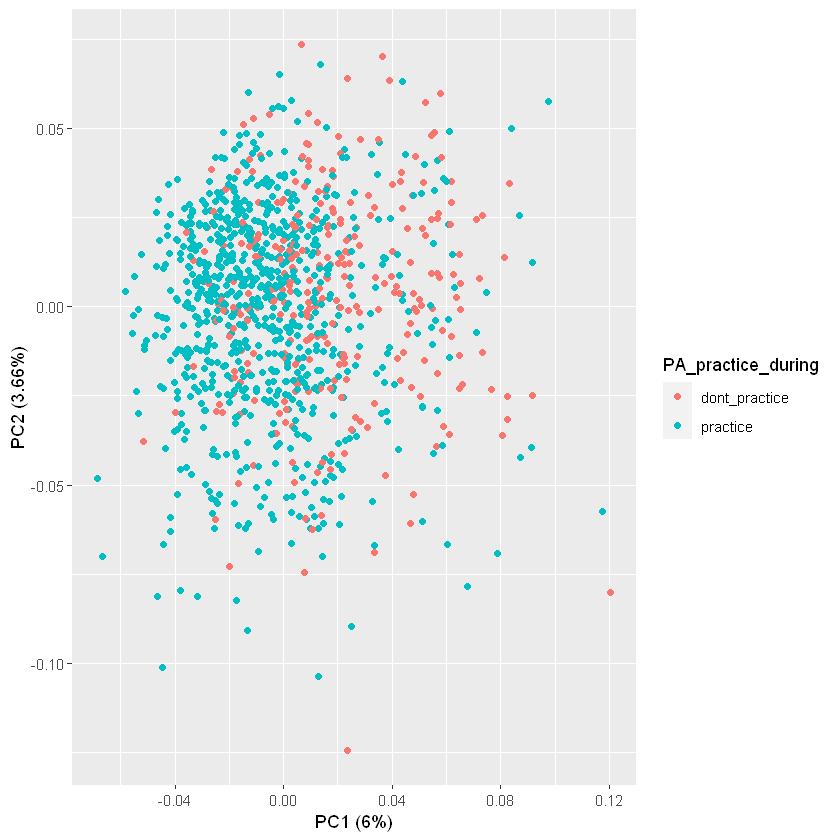

In [94]:
autoplot(encoded_dataset.pca, colour="PA_practice_during", data=before_dataset)

# Decision Trees

## Finding out the majority class


In [67]:
table(before_dataset[, "PA_practice_during"])


dont_practice      practice 
          337           884 

## Creating the dataset partition

In [68]:
set.seed(2)
lista_treino <- createDataPartition(before_dataset$PA_practice_during, p=0.7, list=FALSE)
treino <- before_dataset[lista_treino,]
teste <- before_dataset[-lista_treino,]

## Applying augmentation into the training set

In [69]:
treino.aug <- data_augmentation(
    train_data=treino,
    yname="PA_practice_during",
    maj_class = "practice",
    min_classes = c("dont_practice"),
    ycol=match("PA_practice_during",names(before_dataset))
)

table(treino.aug[, "PA_practice_during"])


dont_practice      practice 
          618           619 

## Kappa metric without augmentation

In [73]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "boot"),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
print(model$matrix$table[2, 2])
rpart.plot(model$result$finalModel)

[1] 242


## Kappa metric with augmentation

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            52       56
  practice                 49      209
                                          
               Accuracy : 0.7131          
                 95% CI : (0.6638, 0.7589)
    No Information Rate : 0.724           
    P-Value [Acc > NIR] : 0.7028          
                                          
                  Kappa : 0.2972          
                                          
 Mcnemar's Test P-Value : 0.5582          
                                          
            Sensitivity : 0.5149          
            Specificity : 0.7887          
         Pos Pred Value : 0.4815          
         Neg Pred Value : 0.8101          
             Prevalence : 0.2760          
         Detection Rate : 0.1421          
   Detection Prevalence : 0.2951          
      Balanced Accuracy : 0.6518          
                                          
       '

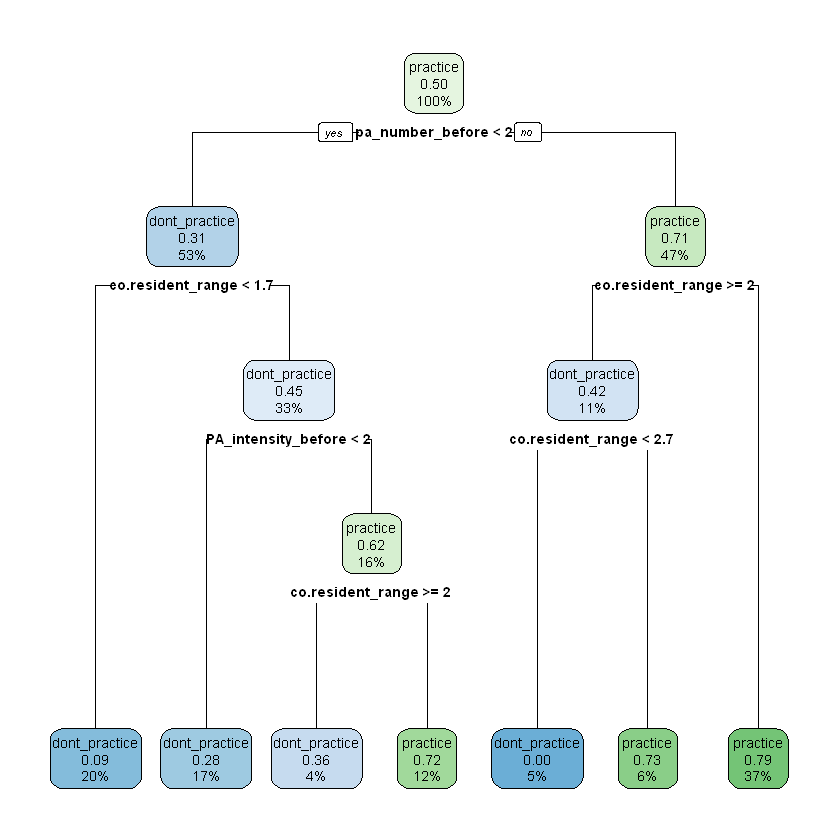

In [49]:
model <- fit_model(
    model_method="rpart",
    model_metric="Kappa",
    trControl_func = trainControl(method = "boot"),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

## F-beta score without augmentation

In [50]:
fbeta <- function (data, lev=NULL, model = NULL){
    fb_val <- FBeta_Score(data$obs, data$pred, positive="practice", beta = 0.1)
    c(FB = fb_val)
}

Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            32       23
  practice                 69      242
                                          
               Accuracy : 0.7486          
                 95% CI : (0.7009, 0.7923)
    No Information Rate : 0.724           
    P-Value [Acc > NIR] : 0.1601          
                                          
                  Kappa : 0.2678          
                                          
 Mcnemar's Test P-Value : 2.711e-06       
                                          
            Sensitivity : 0.31683         
            Specificity : 0.91321         
         Pos Pred Value : 0.58182         
         Neg Pred Value : 0.77814         
             Prevalence : 0.27596         
         Detection Rate : 0.08743         
   Detection Prevalence : 0.15027         
      Balanced Accuracy : 0.61502         
                                          
       '

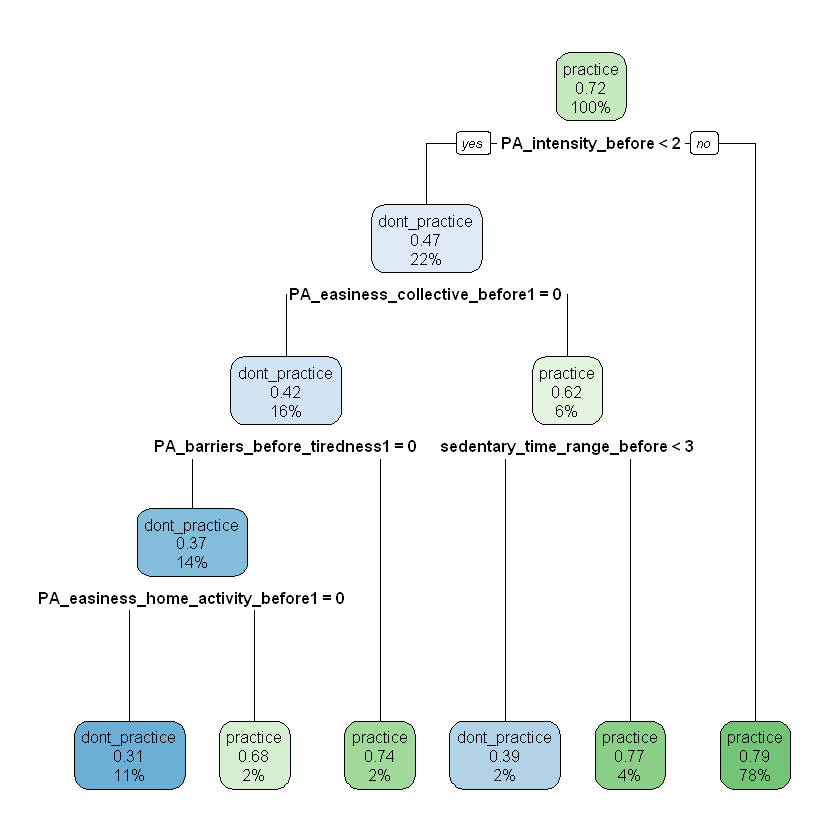

In [51]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)

In [52]:
gini = varImp(model$result$finalModel)
#gini[order(gini)]
head(gini, 10)
# plot(varImp(model$result$finalModel), main="Variables Importance - Decision Tree") 

,Overall
,<dbl>
age_range,8.204233
PA_barriers_before_time_convenience1,2.542328
PA_barriers_before_tiredness1,6.305880
PA_duration_before,25.205848
PA_easiness_before1,4.596828
PA_easiness_collective_before1,3.007673
PA_easiness_home_activity_before1,10.565588
PA_intensity_before,29.577372
pa_number_before,23.255563


## F-beta score with augmentation

Warning message in nominalTrainWorkflow(x = x, y = y, wts = weights, info = trainInfo, :
"There were missing values in resampled performance measures."


Confusion Matrix and Statistics

               Reference
Prediction      dont_practice practice
  dont_practice            52       56
  practice                 49      209
                                          
               Accuracy : 0.7131          
                 95% CI : (0.6638, 0.7589)
    No Information Rate : 0.724           
    P-Value [Acc > NIR] : 0.7028          
                                          
                  Kappa : 0.2972          
                                          
 Mcnemar's Test P-Value : 0.5582          
                                          
            Sensitivity : 0.5149          
            Specificity : 0.7887          
         Pos Pred Value : 0.4815          
         Neg Pred Value : 0.8101          
             Prevalence : 0.2760          
         Detection Rate : 0.1421          
   Detection Prevalence : 0.2951          
      Balanced Accuracy : 0.6518          
                                          
       '

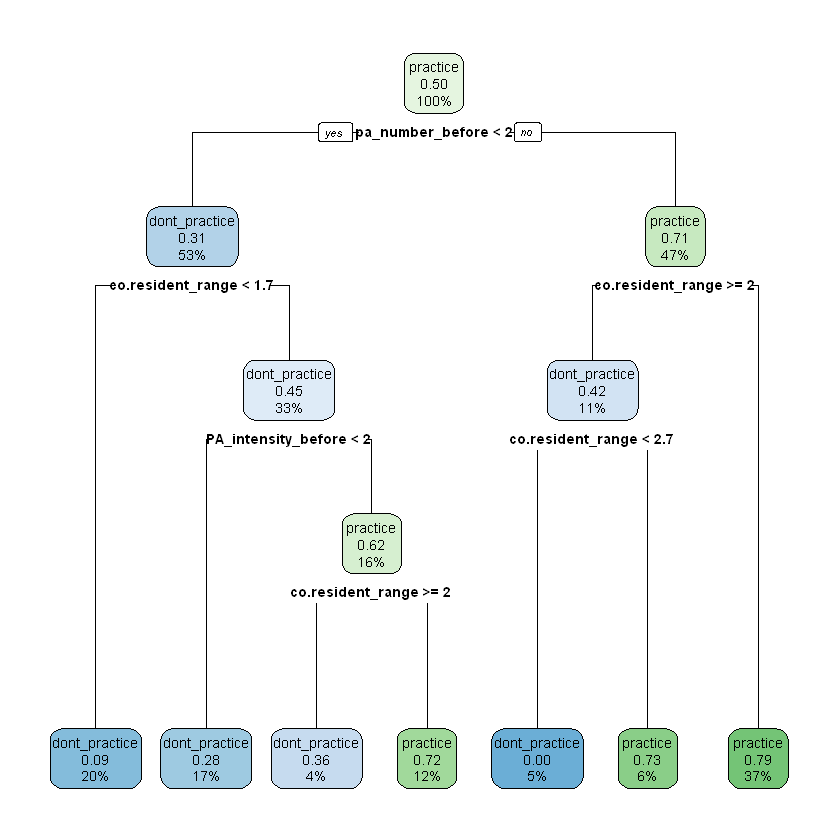

In [53]:
model <- fit_model(
    model_method="rpart",
    model_metric="FB",
    trControl_func = trainControl(method = "boot", summaryFunction=fbeta, classProbs = TRUE),
    train_data = treino.aug,
    test_data=teste,
    yname="PA_practice_during"
)
print(model$matrix)
rpart.plot(model$result$finalModel)